<a href="https://colab.research.google.com/github/cshah1995/Obesity-Classification/blob/main/Obesity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the dataset and requisite libraries

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

#Understanding dataset attributes

**Attributes related with eating habits are:**

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

Consumption of alcohol (CALC).


**Attributes related with the physical condition are:**

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS).

**Other variables were:**

Gender, Age, Height and Weight.


Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

#Exploratory Data Analysis

##Pandas Profiling

In [5]:
#!pip uninstall pandas-profiling

In [6]:
#We installed pandas profiling again to google colab
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [7]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title = 'Obesity_Data', html={'style': {'full width': True}})

In [8]:
#profile.to_notebook_iframe()

##Reading the data

In [9]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [11]:
print(df.shape)
df.info()
print(df['NObeyesdad'].value_counts())

(2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                    

In [12]:
df['NCP'].value_counts()

3.000000    1203
1.000000     199
4.000000      69
3.985442       2
1.104642       2
            ... 
2.658837       1
1.240424       1
2.057935       1
2.337035       1
2.434347       1
Name: NCP, Length: 635, dtype: int64

##Data visualisation and analysis

In [13]:
#sns.pairplot(df)

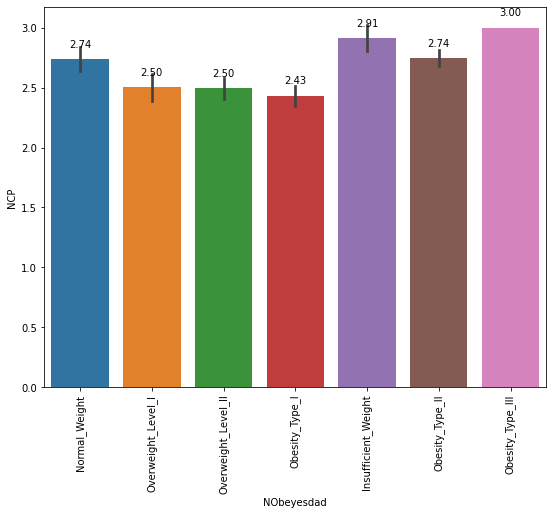

In [14]:
plt.figure(figsize= (9,7))
plots = sns.barplot(x = df['NObeyesdad'], y = df['NCP']);
plt.xticks(rotation=90);
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 15),
                   textcoords='offset points')

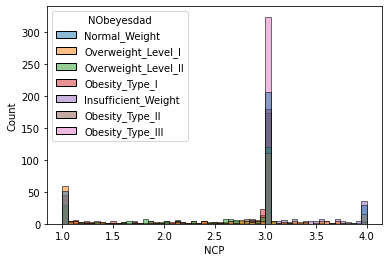

In [15]:
sns.histplot(data = df, x = 'NCP', hue = 'NObeyesdad' )

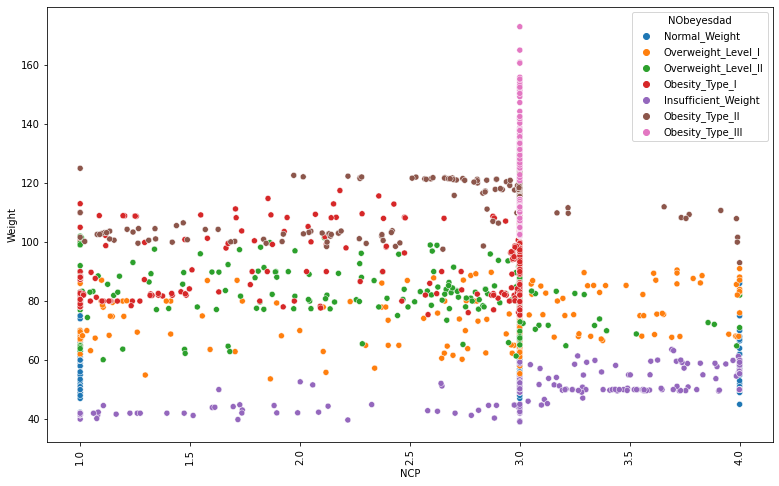

In [16]:
plt.figure(figsize= (13,8))
sns.scatterplot(x = df['NCP'], y= df['Weight'], hue = df['NObeyesdad']);
plt.xticks(rotation=90);


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

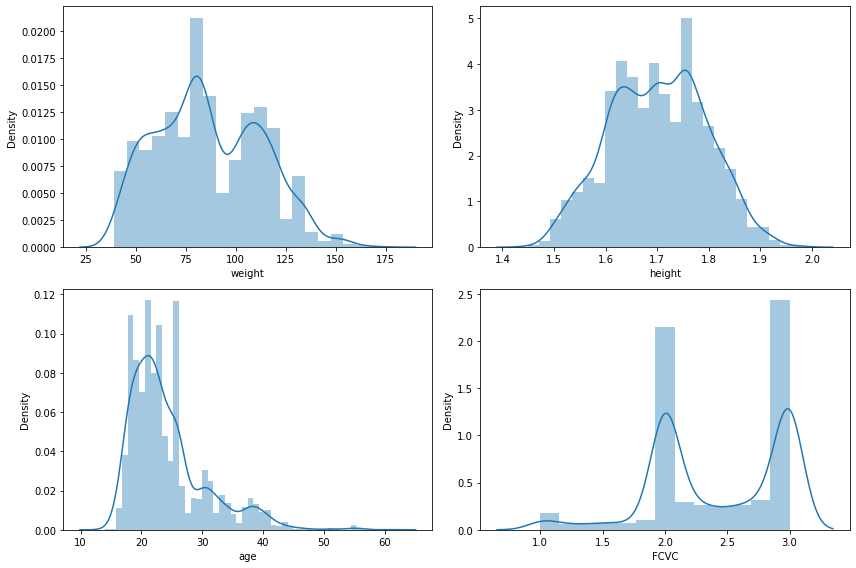

In [17]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.distplot(x = df['Weight']);
plt.xlabel('weight')

plt.subplot(2,2,2)
sns.distplot(x = df['Height']);
plt.xlabel('height')

plt.subplot(2,2,3)
sns.distplot(x = df['Age']);
plt.xlabel('age')

plt.subplot(2,2,4)
sns.distplot(x = df['FCVC']);
plt.xlabel('FCVC')

fig.tight_layout()

In [18]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

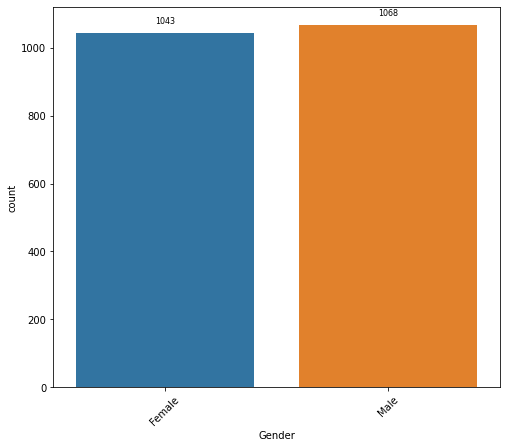

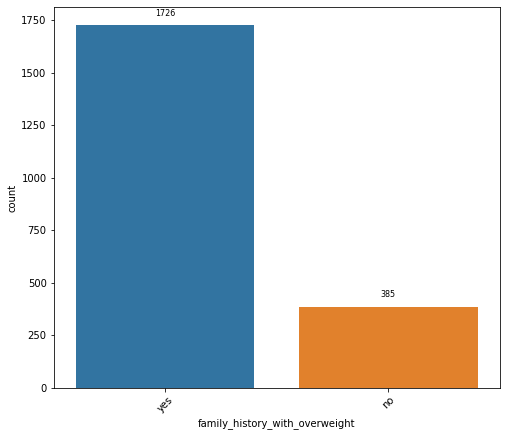

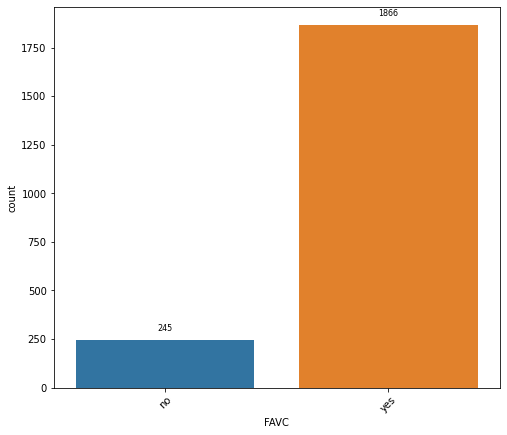

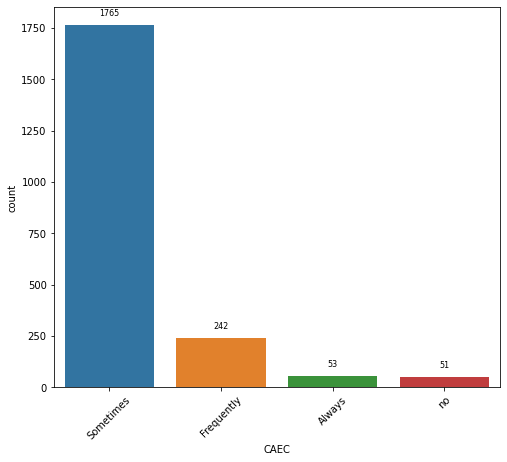

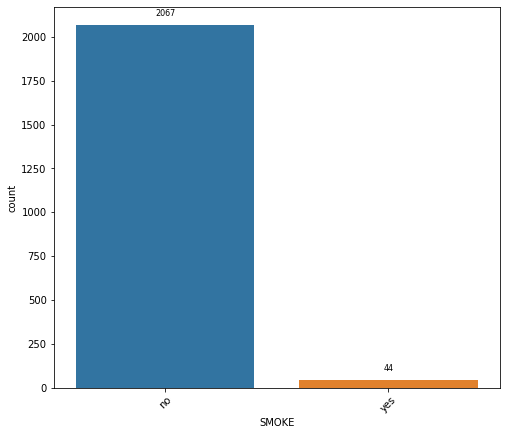

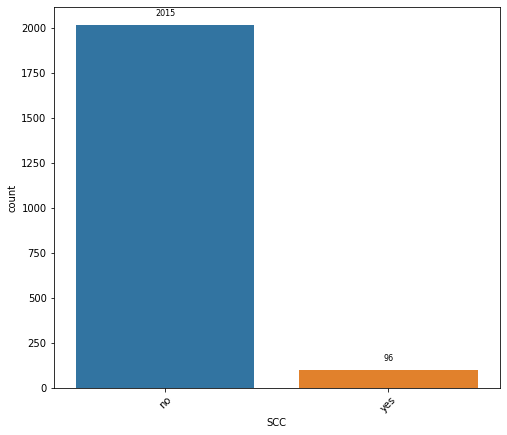

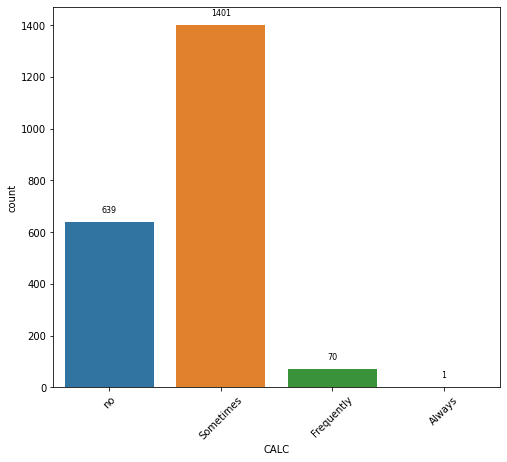

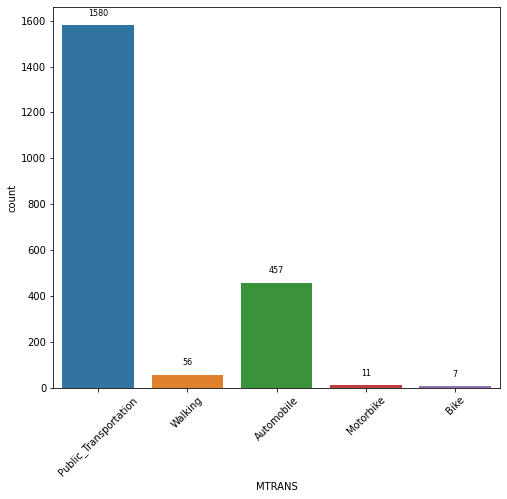

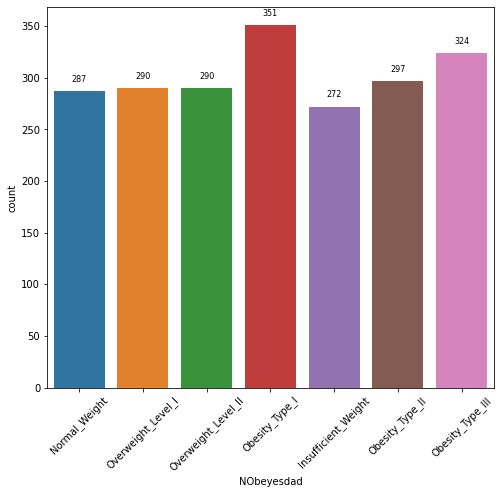

In [19]:
def analyse_cont_var_data(df, var):
    df = df.copy()
    plt.figure(figsize= (8,7))
    plots = sns.countplot(data = df, x = var)
    plt.xticks(rotation=90);
    for bar in plots.patches:
      plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 12),
                   textcoords='offset points')
    plt.xticks(rotation=45)
    plt.show()

for var in cat_cols:
    analyse_cont_var_data(df, var)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

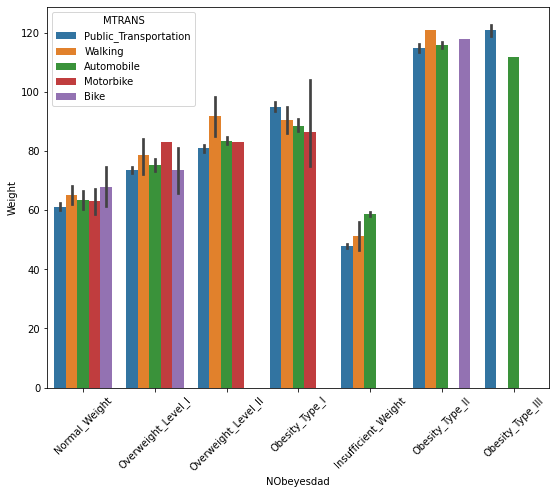

In [20]:
plt.figure(figsize = (9,7))
sns.barplot(y = df['Weight'], x = df['NObeyesdad'], hue = df['MTRANS']);
plt.xticks(rotation=45)

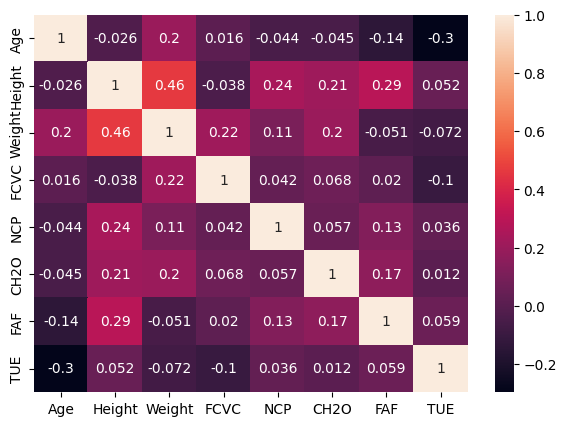

In [21]:
plt.figure(figsize=(7,5), dpi = 100)
sns.heatmap(df.corr(), annot = True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

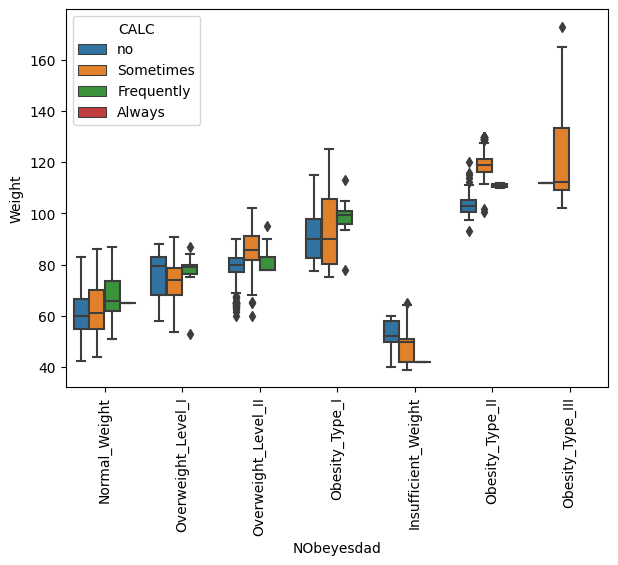

In [22]:
plt.figure(figsize=(7,5), dpi = 100)
sns.boxplot(y = 'Weight', x = 'NObeyesdad', hue = 'CALC', data = df)
plt.xticks(rotation = 90)

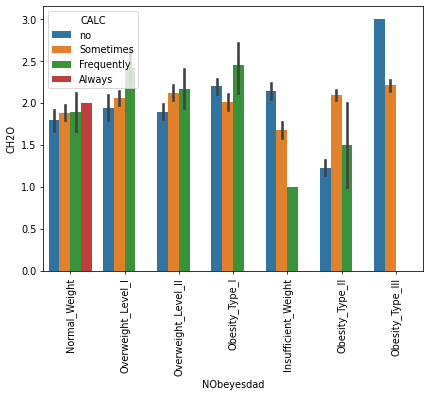

In [23]:
plt.figure(figsize=(7,5), dpi = 70)
sns.barplot(hue = df['CALC'], y = df['CH2O'], x = df['NObeyesdad']);
plt.xticks(rotation = 90);

In [24]:
conditions = [
    (df['FCVC'] <= 1.5),
    (df['FCVC'] > 1.5) & (df['FCVC'] <= 2.5),
    (df['FCVC'] > 2.5)
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FCVC_int'] = np.select(conditions, values)

#to validate above values run below code
#df[['FCVC_int', 'FCVC']][(df['FCVC'] > 1) & (df['FCVC'] < 2)].head(10)

In [25]:
df['NCP'].value_counts()

conditions = [
    (df['NCP'] <= 1.5),
    (df['NCP'] > 1.5) & (df['NCP'] <= 2.5),
    (df['NCP'] > 2.5) & (df['NCP'] <= 3.5),
    (df['NCP'] > 3.5)
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4]

# create a new column and use np.select to assign values to it using our lists as arguments
df['NCP_int'] = np.select(conditions, values)

#to validate above values run below code
#df[['NCP_int', 'NCP']][(df['NCP'] > 3) & (df['NCP'] < 4)].head(10)

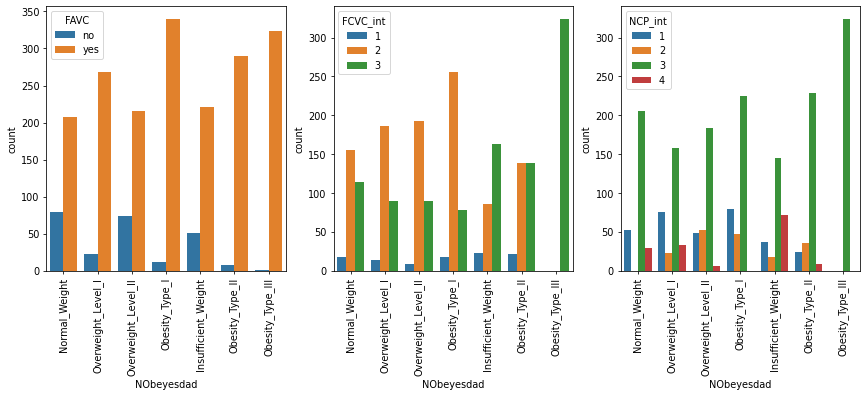

In [26]:
plt.figure(figsize=(15,5), dpi = 70)

plt.subplot(1,3,1)
sns.countplot(x = df['NObeyesdad'], hue = df['FAVC']);
plt.xticks(rotation = 90);

plt.subplot(1,3,2)
sns.countplot(x = df['NObeyesdad'], hue = df['FCVC_int']);
plt.xticks(rotation = 90);

plt.subplot(1,3,3)
sns.countplot(x = df['NObeyesdad'], hue = df['NCP_int']);
plt.xticks(rotation = 90);


In [27]:
df['BMI'] = df['Weight']/((df['Height'])**2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


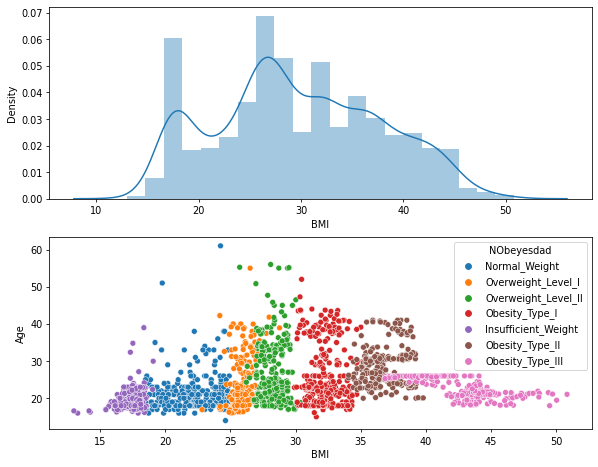

In [28]:
plt.figure(figsize=(10,8), dpi = 70)

plt.subplot(2,1,1)
sns.distplot(df['BMI'])

plt.subplot(2,1,2)
sns.scatterplot(x = df['BMI'], y = df['Age'], hue = df['NObeyesdad'])

#Feature engineering and data cleaning

In [29]:
df.drop_duplicates(keep = 'first', inplace = True)

In [30]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'FCVC_int', 'NCP_int', 'BMI'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [32]:
df['Age'] = df['Age'].astype(int)

In [33]:
df['CALC'].value_counts()

Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

In [34]:
df['CALC'].replace(to_replace =['Frequently', 'Always'], 
                            value ="Regular", inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [36]:
#df['BMI'] = df['Weight']/((df['Height'])**2)

In [37]:
df['FCVC'].value_counts(sorted)

3.000000    0.310014
2.000000    0.278390
1.000000    0.015812
2.823179    0.000958
2.816460    0.000958
              ...   
1.943130    0.000479
2.530233    0.000479
1.443674    0.000479
2.076689    0.000479
2.562100    0.000479
Name: FCVC, Length: 810, dtype: float64

In [38]:
#conditions = [
#    (df['FCVC'] <= 1.5),
#    (df['FCVC'] > 1.5) & (df['FCVC'] <= 2.5),
#    (df['FCVC'] > 2.5)
#    ]

# create a list of the values we want to assign for each condition
#values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments
#df['FCVC_int'] = np.select(conditions, values)

#to validate above values run below code
#df[['FCVC_int', 'FCVC']][(df['FCVC'] > 1) & (df['FCVC'] < 2)].head(10)

In [39]:
#df['NCP'].value_counts()

#conditions = [
#    (df['NCP'] <= 1.5),
#    (df['NCP'] > 1.5) & (df['NCP'] <= 2.5),
#    (df['NCP'] > 2.5) & (df['NCP'] <= 3.5),
#    (df['NCP'] > 3.5)
#    ]

# create a list of the values we want to assign for each condition
#values = [1,2,3,4]

# create a new column and use np.select to assign values to it using our lists as arguments
#df['NCP_int'] = np.select(conditions, values)

#to validate above values run below code
#df[['NCP_int', 'NCP']][(df['NCP'] > 3) & (df['NCP'] < 4)].head(10)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [41]:
cat_cols
cat_cols_train = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [42]:
dummy_cols = pd.get_dummies(data = df, columns = cat_cols_train, drop_first = True)

In [43]:
#df['MTRANS'].value_counts()
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,FCVC_int,NCP_int,BMI
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,2,3,24.386526
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,3,3,24.238227
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Regular,Public_Transportation,Normal_Weight,2,3,23.765432
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Regular,Walking,Overweight_Level_I,3,3,26.851852
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2,1,28.342381


In [44]:
df = pd.merge( df, dummy_cols)

In [45]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,FCVC_int,NCP_int,BMI,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,2,3,24.386526,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,3,3,24.238227,0,1,0,0,1,0,1,1,1,0,0,0,1,0
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Regular,Public_Transportation,Normal_Weight,2,3,23.765432,1,1,0,0,1,0,0,0,0,0,0,0,1,0
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Regular,Walking,Overweight_Level_I,3,3,26.851852,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2,1,28.342381,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [46]:
df.drop(labels = cat_cols_train, axis = 1, inplace = True)

#Splitting the data

In [47]:
X= df.drop(labels = 'NObeyesdad', axis = 1)
y = df['NObeyesdad']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [49]:
scaler = StandardScaler()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_trsc =  scaler.fit_transform(X_train)
X_tstsc = scaler.transform(X_test)


#Data Modelling

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

##Logistic Regression

In [53]:
LogR = LogisticRegression(max_iter=1000, C= 1, penalty= 'l1', solver = 'saga' )
LogR.fit(X_trsc, y_train)
y_pred = LogR.predict(X_tstsc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


###Evaluation metrics

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        76
      Normal_Weight       0.98      0.78      0.87        80
     Obesity_Type_I       0.95      0.91      0.93        80
    Obesity_Type_II       0.96      0.99      0.97        79
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.80      0.95      0.87        58
Overweight_Level_II       0.91      0.92      0.92        66

           accuracy                           0.93       523
          macro avg       0.93      0.94      0.93       523
       weighted avg       0.94      0.93      0.93       523

Precision score - weighted: 0.9395962702397888
Recall score - weighted: 0.9349904397705545
F1 score - weighted: 0.9343824698580508
Accuracy score: 0.9349904397705545


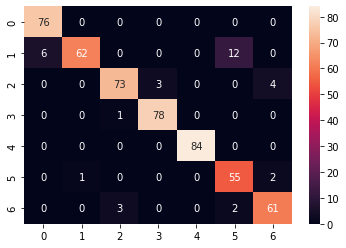

In [77]:
print(classification_report(y_test, y_pred))

print('Precision score - weighted:', precision_score(y_test, y_pred, average='weighted'))
print('Recall score - weighted:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score - weighted:', f1_score(y_test, y_pred, average='weighted'))

print('Accuracy score:', accuracy_score( y_test, y_pred))
conf_mx = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(15, 6))
#plt.subplot(1,2,1)
sns.heatmap(conf_mx, annot=True);

#plt.subplot(1,2,2)
#sns.heatmap(conf_mx/np.sum(conf_mx), annot=True, fmt='.2%', cmap='Blues')

In [57]:
#from Pipeline import make_pipeline
#pipe = make_pipeline(StandardScaler(), LogisticRegression())
#pipe.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#               ('logisticregression', LogisticRegression())])

#pipe.score(X_test, y_test)

##Decision Tree

In [59]:
DTC = DecisionTreeClassifier()
#criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None

DTC.fit(X_train, y_train)
ypred_dtc = DTC.predict(X_test)


###Evalaution Metrics

                     precision    recall  f1-score   support

Insufficient_Weight       0.99      1.00      0.99        76
      Normal_Weight       0.99      0.99      0.99        80
     Obesity_Type_I       0.97      0.95      0.96        80
    Obesity_Type_II       0.95      0.97      0.96        79
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.98      0.97      0.97        58
Overweight_Level_II       0.98      0.98      0.98        66

           accuracy                           0.98       523
          macro avg       0.98      0.98      0.98       523
       weighted avg       0.98      0.98      0.98       523

Precision score - weighted: 0.9809616186121504
Recall score - weighted: 0.9808795411089866
F1 score - weighted: 0.9808599422792563
Accuracy score: 0.9808795411089866


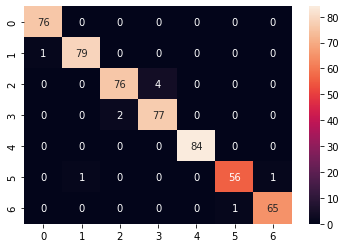

In [60]:
print(classification_report(y_test, ypred_dtc))

print('Precision score - weighted:', precision_score(y_test, ypred_dtc, average='weighted'))
print('Recall score - weighted:', recall_score(y_test, ypred_dtc, average='weighted'))
print('F1 score - weighted:', f1_score(y_test, ypred_dtc, average='weighted'))
print('Accuracy score:', accuracy_score( y_test, ypred_dtc))

conf_mx = confusion_matrix(y_test, ypred_dtc)

#plt.figure(figsize=(15, 6))
#plt.subplot(1,2,1)
sns.heatmap(conf_mx, annot=True);


##SVM Classifier

In [80]:
svc = SVC()
svc.fit(X_trsc, y_train)
ypred_svc = svc.predict(X_tstsc)

###Evaluation Metrics

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.89      0.91        76
      Normal_Weight       0.72      0.85      0.78        80
     Obesity_Type_I       0.97      0.86      0.91        80
    Obesity_Type_II       0.96      0.97      0.97        79
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.77      0.79      0.78        58
Overweight_Level_II       0.89      0.82      0.85        66

           accuracy                           0.89       523
          macro avg       0.89      0.88      0.89       523
       weighted avg       0.90      0.89      0.89       523

Precision score - weighted: 0.8974067610355259
Recall score - weighted: 0.8910133843212237
F1 score - weighted: 0.892681629896518
Accuracy score: 0.8910133843212237


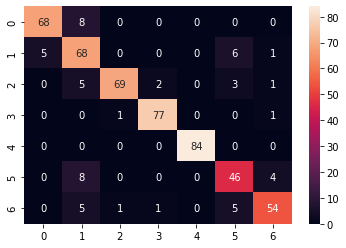

In [81]:
print(classification_report(y_test, ypred_svc))

print('Precision score - weighted:', precision_score(y_test, ypred_svc, average='weighted'))
print('Recall score - weighted:', recall_score(y_test, ypred_svc, average='weighted'))
print('F1 score - weighted:', f1_score(y_test, ypred_svc, average='weighted'))
print('Accuracy score:', accuracy_score( y_test, ypred_svc))
conf_mx = confusion_matrix(y_test, ypred_svc)

#plt.figure(figsize=(15, 6))
#plt.subplot(1,2,1)
sns.heatmap(conf_mx, annot=True);

###Parameter tuning for SVC

In [85]:
svcg = SVC()
grid = {
    'C' : [0.05, 0.01],
    'kernel' : ['poly', 'rbf', 'sigmoid'],
    'gamma' : [1, 0.1],
    'degree' : [2,3,4]
}

svcgrid = GridSearchCV(svcg, param_grid=grid, cv=5, scoring= 'f1_macro', return_train_score=True)

svcgrid.fit(X_trsc, y_train)
ypred_svcgrid = svcgrid.predict(X_tstsc)

In [86]:
print(svcgrid.best_score_)
print(svcgrid.best_params_)

0.9007623582378187
{'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92        76
      Normal_Weight       0.72      0.74      0.73        80
     Obesity_Type_I       0.95      0.90      0.92        80
    Obesity_Type_II       0.99      0.97      0.98        79
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.77      0.71      0.74        58
Overweight_Level_II       0.76      0.85      0.80        66

           accuracy                           0.88       523
          macro avg       0.87      0.87      0.87       523
       weighted avg       0.88      0.88      0.88       523

Precision score - weighted: 0.8798307825150936
Recall score - weighted: 0.8776290630975143
F1 score - weighted: 0.8781167332526673
Accuracy score: 0.8776290630975143


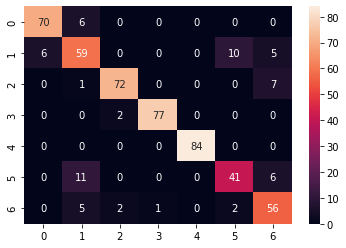

In [87]:
print(classification_report(y_test, ypred_svcgrid))

print('Precision score - weighted:', precision_score(y_test, ypred_svcgrid, average='weighted'))
print('Recall score - weighted:', recall_score(y_test, ypred_svcgrid, average='weighted'))
print('F1 score - weighted:', f1_score(y_test, ypred_svcgrid, average='weighted'))
print('Accuracy score:', accuracy_score( y_test, ypred_svcgrid))
conf_mx = confusion_matrix(y_test, ypred_svcgrid)

#plt.figure(figsize=(15, 6))
#plt.subplot(1,2,1)
sns.heatmap(conf_mx, annot=True);

##Random Forest

In [70]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(X_test)



###Evaluation Metrics

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        76
      Normal_Weight       0.98      0.99      0.98        80
     Obesity_Type_I       1.00      1.00      1.00        80
    Obesity_Type_II       1.00      1.00      1.00        79
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.98      0.97      0.97        58
Overweight_Level_II       0.98      0.98      0.98        66

           accuracy                           0.99       523
          macro avg       0.99      0.99      0.99       523
       weighted avg       0.99      0.99      0.99       523

Precision score - weighted: 0.9923654827884811
Recall score - weighted: 0.9923518164435946
F1 score - weighted: 0.9923446908067409
Accuracy score: 0.9923518164435946


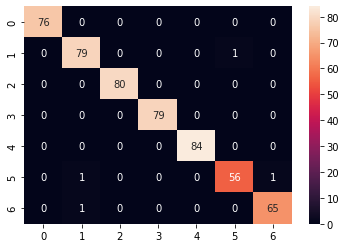

In [71]:
print(classification_report(y_test, ypred_rfc))

print('Precision score - weighted:', precision_score(y_test, ypred_rfc, average='weighted'))
print('Recall score - weighted:', recall_score(y_test, ypred_rfc, average='weighted'))
print('F1 score - weighted:', f1_score(y_test, ypred_rfc, average='weighted'))
print('Accuracy score:', accuracy_score( y_test, ypred_rfc))
conf_mx = confusion_matrix(y_test, ypred_rfc)

#plt.figure(figsize=(15, 6))
#plt.subplot(1,2,1)
sns.heatmap(conf_mx, annot=True);

In [108]:
roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr', average='weighted')


0.9999537720377707

#Finding out the top features

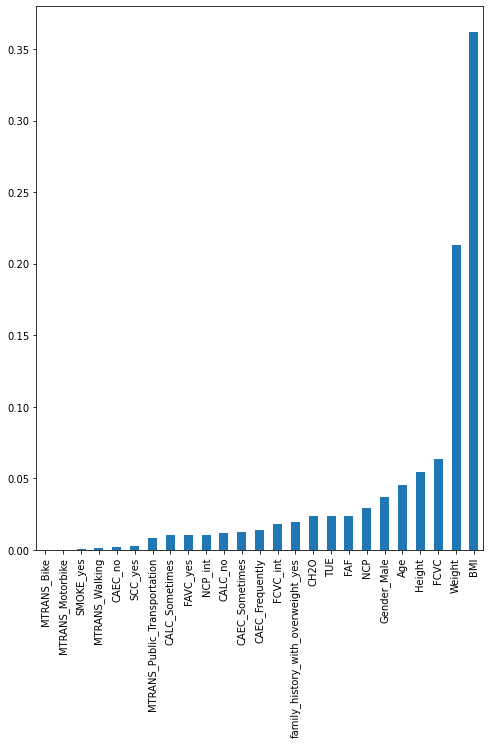

In [110]:
coef = pd.Series(rfc.feature_importances_, index = X_train.columns)

imp_coef = coef.sort_values()

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")

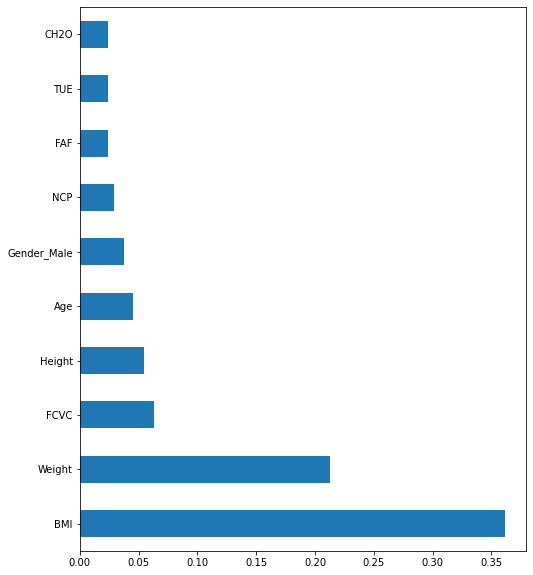

In [112]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()